# DSR - Deep Learning from Scratch  - Day 1
Welcome! During the following two days you will be working on this Python package. You will be asked to make some changes in the package code as well in this notebook, thanks to importlib you just have to do `Kernel -> Restart and Run All` to see how your changes in action.

In [1]:
import johnny_deep

from importlib import reload
reload(johnny_deep.models)
reload(johnny_deep.utils)
reload(johnny_deep.optimizers)

<module 'johnny_deep.optimizers' from '/Users/marco/Area51/johnny_deep/johnny_deep/optimizers.py'>

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

We will use the `make_moons` dataset as a toy example, it will have very few sample but it's non linear enough to make the workshop interesting.

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(n_samples=1000, noise=0.10, random_state=100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = X_train.transpose()
X_test = X_test.transpose()
del X, Y

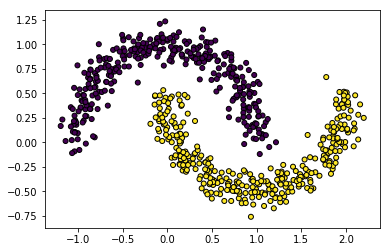

In [5]:
plt.scatter(X_train[0, :], X_train[1, :], marker='o', c=Y_train, s=25, edgecolor='k')

In [6]:
nn_architecture = [
    {"dimension": 2, "type": "input"},
    {"dimension": 10, "type": "tanh"},
    {"dimension": 10, "type": "tanh"},
    {"dimension": 1, "type": "sigmoid"},
]

In [7]:
m = johnny_deep.models.Model(nn_architecture)
optimizer = johnny_deep.optimizers.Momentum(learning_rate=0.3)
theta = m.fit(X_train, Y_train, optimizer, no_of_epochs=2000, gradient_check_every=None, print_every=100)

Layer 1: tanh dimension 10
W shape: (10, 2)
b shape: (10, 1)
Layer 2: tanh dimension 10
W shape: (10, 10)
b shape: (10, 1)
Layer 3: sigmoid dimension 1
W shape: (1, 10)
b shape: (1, 1)
Epoch 0, cost: 0.69339295322883
Epoch 100, cost: 0.2617616167974355
Epoch 200, cost: 0.2568089372175276
Epoch 300, cost: 0.25484586728344294
Epoch 400, cost: 0.25360201938760235
Epoch 500, cost: 0.2527502086086726
Epoch 600, cost: 0.2521304054824959
Epoch 700, cost: 0.25165611706051805
Epoch 800, cost: 0.25127477347588884
Epoch 900, cost: 0.2509460007862203
Epoch 1000, cost: 0.2506125230941545
Epoch 1100, cost: 0.25006190352536106
Epoch 1200, cost: 0.2471061736331527
Epoch 1300, cost: 0.15371286476868637
Epoch 1400, cost: 0.0419934761979107
Epoch 1500, cost: 0.02294363027796628
Epoch 1600, cost: 0.01595905937230707
Epoch 1700, cost: 0.012283151952652158
Epoch 1800, cost: 0.009980593006334932
Epoch 1900, cost: 0.008390576866818409
Epoch 2000, cost: 0.007224365325953089


In [8]:
Y_hat = m.forward(theta, X_test)

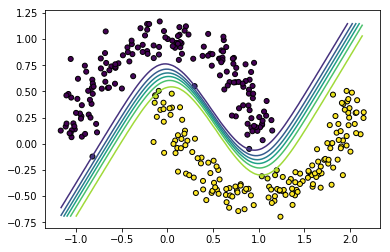

In [9]:
johnny_deep.utils.plot_with_countours(plt, X_test, Y_hat, m, theta)